In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline

import shapefile as shp
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [65]:
df_navent = pd.read_csv('data/train.csv', dtype={'tipodepropiedad':'category', 'ciudad':'category', 'provincia':'category', 'id':'int32', 'antiguedad':'float16', 'habitaciones':'float16', 'garages':'float16', 'banos':'float16', 'metroscubiertos':'float16', 'metrostotales':'float16', 'idzona':'float16', 'lat':'float16', 'lng':'float16', 'gimnasio':'bool', 'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool', 'centroscomercialescercanos':'bool'}, parse_dates=['fecha'])

In [66]:
precios_dolares = pd.read_csv('../data/precios_en_dolares.csv')

In [67]:
df_navent = df_navent.merge(precios_dolares, how='left')

In [68]:
del precios_dolares

## Cloropleth de ciudades

Arranque haciendo con geopandas pero el gráfico no se hacía asi que para el gráfico cambié a basemap 

Los shapefiles se obtienen de: https://esoc.princeton.edu/file-type/gis-data#Mexico (Municipalidades)

In [69]:
fp = 'data/shp/Mexican_Municipalities/Mexican Municipalities.shp'
df_map = gpd.read_file(fp)[['NOM_MUN','geometry']].to_crs('+proj=robin')
df_map = df_map.rename(columns={'NOM_MUN': 'ciudad'})

In [70]:
df_map.head()

,ciudad,geometry
0,Tlalpan,POLYGON ((-9215889.724437028 2064426.635349321...
1,Xochimilco,POLYGON ((-9211408.535305906 2054553.856774347...
2,La Magdalena Contreras,POLYGON ((-9220773.891009877 2061624.955241656...
3,Azcapotzalco,POLYGON ((-9209090.556132214 2085864.636927485...
4,Benito Jurez,POLYGON ((-9210091.704231462 2070291.536902894...


In [71]:
df_map_ciudad = df_map[['ciudad']].copy()

In [72]:
df_map_ciudad.head(2)

,ciudad
0,Tlalpan
1,Xochimilco


In [73]:
#saco tildes para matchear con shapefile
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"á", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"é", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"í", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ó", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ú", "")
df_navent['ciudad'] = df_navent['ciudad'].str.replace(u"ñ", "")

In [74]:
idx1 = pd.Index(df_navent.ciudad)
idx2 = pd.Index(df_map_ciudad.ciudad)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Alamo Temapache', 'Alvaro Obregn', 'AnAhuac',
       'ApetatitlAn de Antonio Carvajal', 'Atoyac de Alvarez', 'Bacalar',
       'Cancn', 'Chetumal', 'Chilapa de Alvarez', 'CopAndaro',
       'Juchitn de Zaragoza', 'Pachuca', 'Playa del Carmen', 'PolotitlAn',
       'PuruAndiro', 'TacAmbaro', 'TlaltizapAn de Zapata',
       'Villa de Alvarez', 'Villahermosa', 'Yauhquemecan',
       'Zimatln de Alvarez', 'ZirAndaro', 'catln', 'catln de Jurez',
       'caxochitln', 'cmbaro', 'otra', 'utln de Navarro', 'yotln'],
      dtype=object)

### Respecto de esto hay algunas ciudades que como no tener tildes hubo que examinar cuales si estaban en el shapefile que da la forma del mapa

Con str contains y startwith se vio cuales estaban:

In [75]:
df_map.loc[df_map["ciudad"].str.startswith('') &
           df_map['ciudad'].str.contains('lleza') &
            df_map['ciudad'].str.contains(''),:] 

,ciudad,geometry
700,Balleza,POLYGON ((-9770979.311411895 2910077.414312544...


### No descubiertos y que concluyo que no están en el shapefile:
Villahermosa -
<br>
Cancn -
<br>
Juchitn de Zaragoza -
<br>
Playa del Carmen -
<br>
Chetumal -
<br>
Bacalar -
<br>
Otra - Es otra, no es una ciudad
<br>
### Descubiertos:
Alamo Temapache - Alamos (SHP)
<br>
Alvaro Obregn - lvaro Obregn (SHP)
<br>
AnAhuac - Anhuac (SHP)
<br>
ApetatitlAn de Antonio Carvajal - Apetatitln de Antonio Carvajal (SHP)
<br>
Atoyac de Alvarez - Atoyac de lvarez (SHP)
<br>
Chilapa de Alvarez - Chilapa de lvarez (SHP)
<br>
CopAndaro - Copndaro (SHP)
<br>
Pachuca - Pachuca de Soto (SHP)
<br>
PolotitlAn - Polotitln (SHP)
<br>
PuruAndiro - Purundiro (SHP)
<br>
TacAmbaro - Tacmbaro (SHP)
<br>
TlaltizapAn de Zapata - Tlaltizapn (SHP)
<br>
Villa de Alvarez - Villa de lvarez (SHP)
<br>
Yauhquemecan - Yauhquemehcan (SHP)
<br>
Zimatln de Alvarez - Zimatln de lvarez (SHP)
<br>
ZirAndaro - Zirndaro (SHP)
<br>
catln - Acatln (SHP)
<br>
catln de Jurez - Acatln de Jurez (SHP)
<br>
caxochitln - Acaxochitln (SHP)
<br>
cmbaro - Acmbaro (SHP)
<br>
utln de Navarro - Autln de Navarro (SHP)
<br>
yotln - Ayotln (SHP)

In [76]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alamo Temapache": "Alamos"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Alvaro Obregn": "lvaro Obregn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"AnAhuac": "Anhuac"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ApetatitlAn de Antonio Carvajal": "Apetatitln de Antonio Carvajal"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Atoyac de Alvarez": "Atoyac de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Chilapa de Alvarez": "Chilapa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"CopAndaro": "Copndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Pachuca": "Pachuca de Soto"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PolotitlAn": "Polotitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"PuruAndiro": "Purundiro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TlaltizapAn de Zapata": "Tlaltizapn"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Villa de Alvarez": "Villa de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Yauhquemecan": "Yauhquemehcan"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"Zimatln de Alvarez": "Zimatln de lvarez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"ZirAndaro": "Zirndaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"catln de Jurez": "Acatln de Jurez"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"caxochitln": "Acaxochitln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"utln de Navarro": "Autln de Navarro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"yotln": "Ayotln"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"cmbaro": "Acmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({"TacAmbaro": "Tacmbaro"})
df_navent['ciudad'] = df_navent['ciudad'].replace({'catln':'Acatln'})

In [77]:
df_navent_ciudad = df_navent[['id','ciudad']].copy()

In [78]:
df_navent_ciudad = df_navent_ciudad.groupby('ciudad').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [79]:
df_navent_ciudad.head()

,ciudad,cantidad
0,Quertaro,12646
1,Benito Jurez,11014
2,Zapopan,10360
3,San Luis Potos,7925
4,Mrida,7162


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


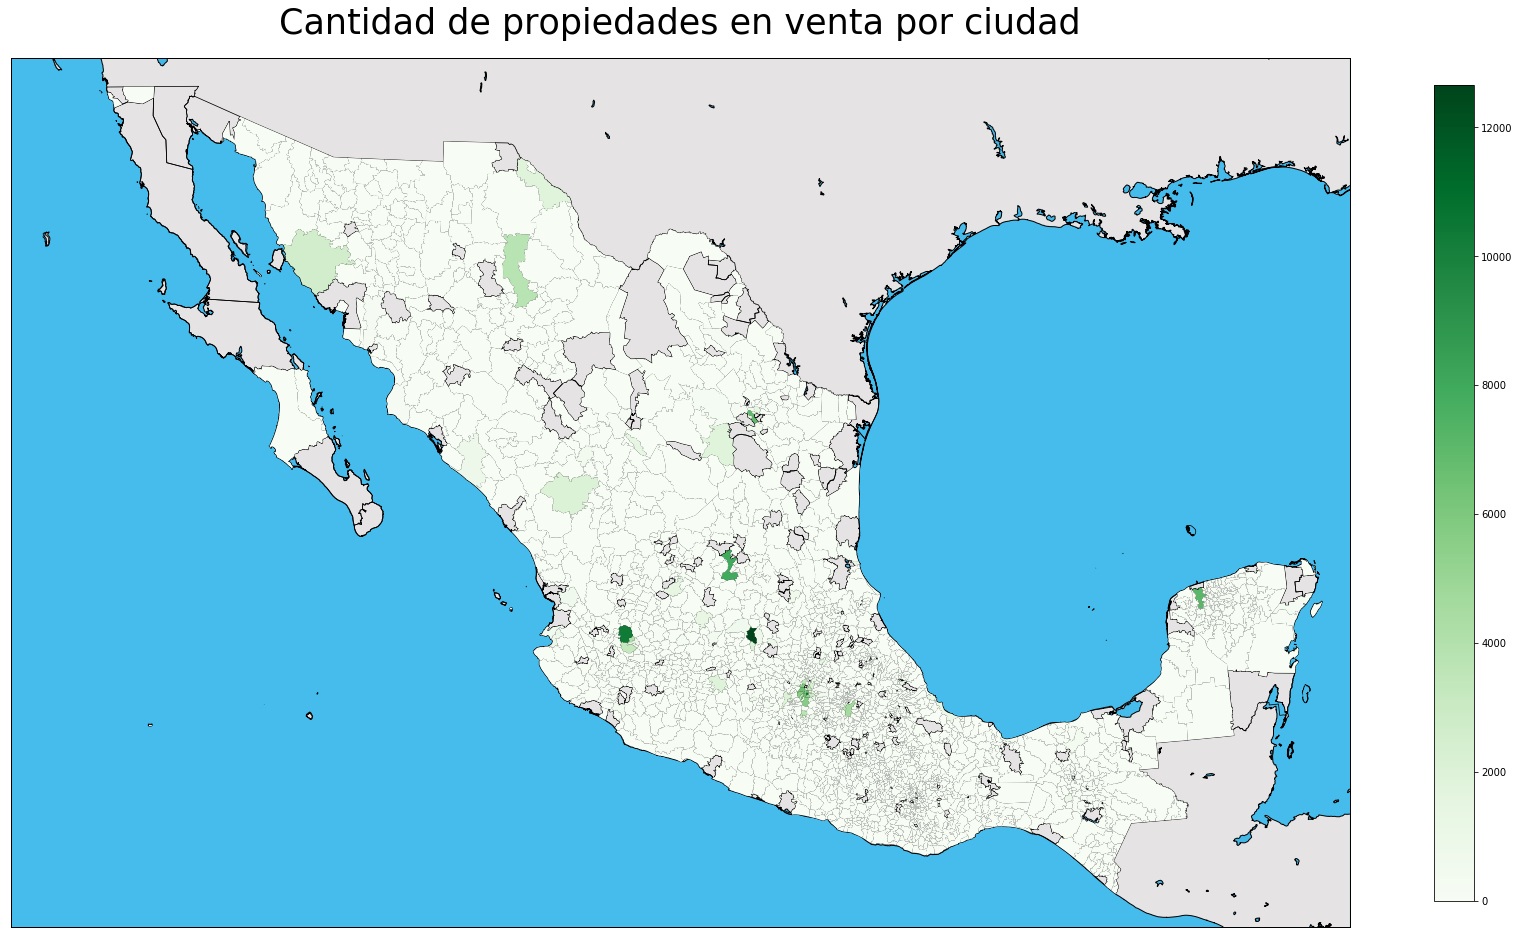

In [80]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_Municipalities/Mexican Municipalities','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'ciudad': [ciudad['NOM_MUN'] for ciudad in mexicoMap.shapefile_info]
    })

merge_ciudad_and_map = df_map_shp.merge(df_navent_ciudad, on='ciudad', how='left')
merge_ciudad_and_map = merge_ciudad_and_map.drop_duplicates('ciudad')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_ciudad_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_ciudad_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_ciudad_and_map['cantidad'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Cantidad de propiedades en venta por ciudad",fontsize=35,pad=25)
#plt.savefig('img/cant_prop_en_venta_ciudad.png')
plt.show()

## Cloropleth de provincias

In [81]:
fp2 = 'data/shp/Mexican_States/Mexican States.shp'
df_map_2 = gpd.read_file(fp2)[['NOM_ENT','geometry']].to_crs('+proj=robin')
df_map_2 = df_map_2.rename(columns={'NOM_ENT': 'provincia'})

In [82]:
df_map_provincia = df_map_2[['provincia']].copy()

In [83]:
#saco tildes para matchear con shapefile
df_navent['provincia'] = df_navent['provincia'].str.replace(u"á", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"é", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"í", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ó", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ú", "")
df_navent['provincia'] = df_navent['provincia'].str.replace(u"ñ", "")

In [84]:
idx1 = pd.Index(df_navent.provincia)
idx2 = pd.Index(df_map_provincia.provincia)

arrayDiff = idx1.difference(idx2).values
arrayDiff

array([nan, 'Baja California Norte', 'Coahuila', 'Edo. de Mxico',
       'Michoacn', 'San luis Potos', 'Veracruz'], dtype=object)

In [85]:
df_map_2.loc[df_map_2["provincia"].str.startswith('Baja') &
            df_map_2['provincia'].str.contains('alifornia') &
            df_map_2['provincia'].str.contains(''),:]

,provincia,geometry
5,Baja California,(POLYGON ((-10267308.38027523 3039426.90017507...
7,Baja California Sur,(POLYGON ((-10145912.8575157 2446511.567166308...


### Descubiertos:
Coahuila - Coahuila de Zaragoza (SHP)
<br>
Michoacn - Michoacn de Ocampo (SHP)
<br>
San luis Potos - San Luis Potos (SHP)
<br>
Veracruz - Veracruz de Ignacio de la Llave (SHP)
<br>
Edo. de Mxico - Mxico (SHP)
<br>
Baja California Norte - Baja California (SHP)

In [86]:
#ciudades descubiertas respecto del shp y los tildes
df_navent['provincia'] = df_navent['provincia'].replace({"Coahuila": "Coahuila de Zaragoza"})
df_navent['provincia'] = df_navent['provincia'].replace({"Michoacn": "Michoacn de Ocampo"})
df_navent['provincia'] = df_navent['provincia'].replace({"San luis Potos": "San Luis Potos"})
df_navent['provincia'] = df_navent['provincia'].replace({"Veracruz": "Veracruz de Ignacio de la Llave"})
df_navent['provincia'] = df_navent['provincia'].replace({"Edo. de Mxico": "Mxico"})
df_navent['provincia'] = df_navent['provincia'].replace({"Baja California Norte": "Baja California"})

In [87]:
df_navent_provincia = df_navent[['id','provincia']].copy()

In [88]:
df_navent_provincia = df_navent_provincia.groupby('provincia').agg(np.size).sort_values(by="id",ascending=False).rename(columns={'id': 'cantidad'}).reset_index()

In [89]:
df_navent_provincia.head()

,provincia,cantidad
0,Distrito Federal,58790
1,Mxico,41607
2,Jalisco,21238
3,Quertaro,16988
4,Nuevo Len,15324


/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


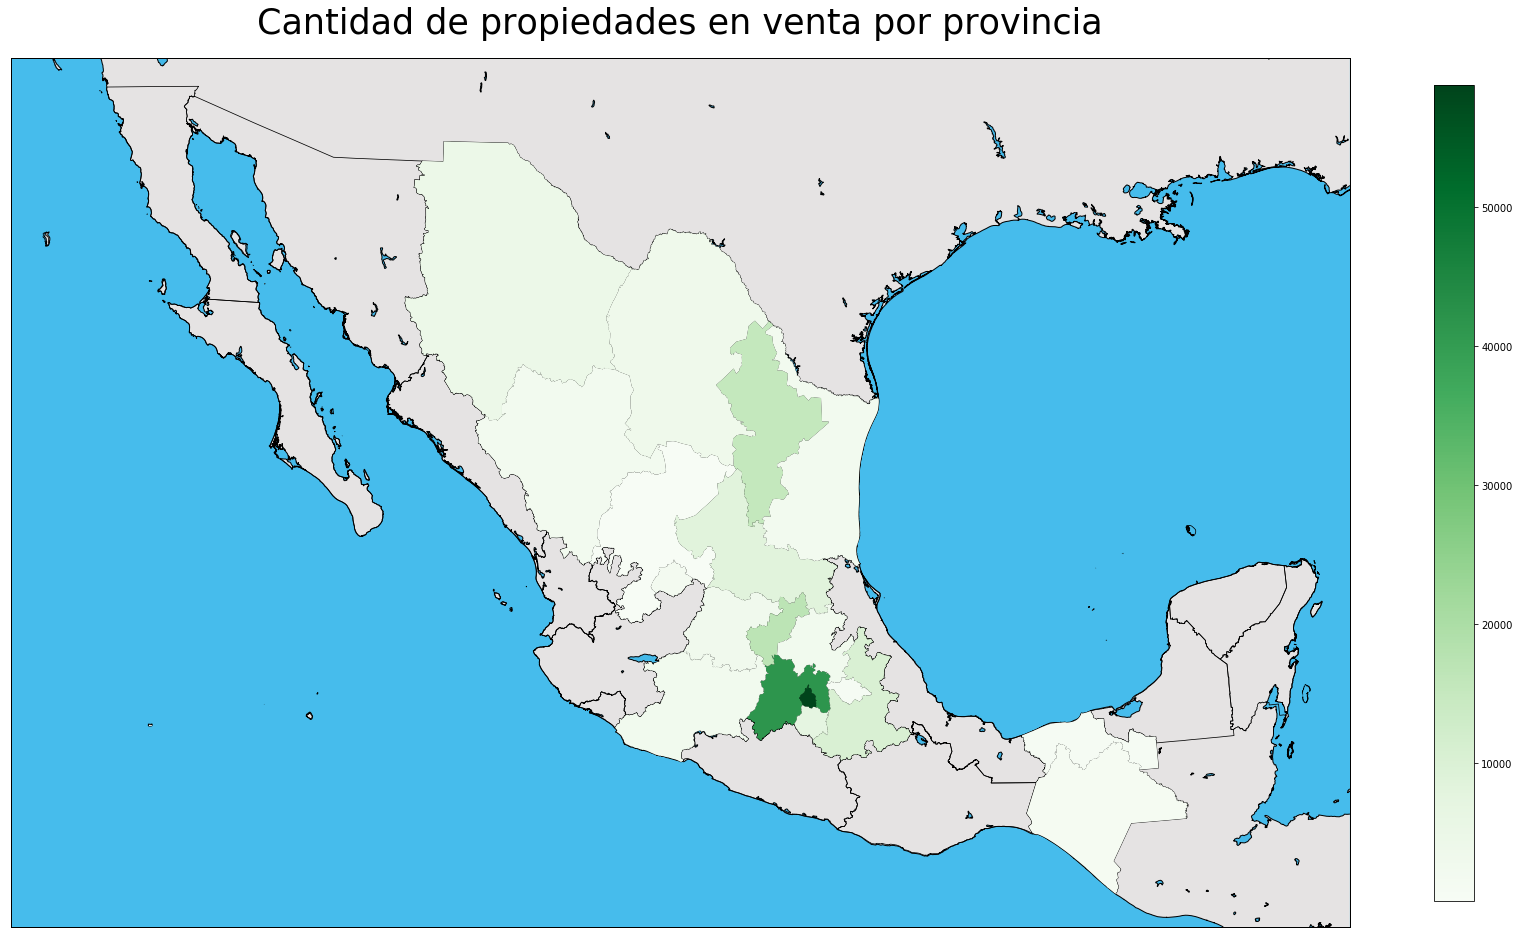

In [90]:
import warnings
warnings.filterwarnings(action='once')

#figura
fig, ax = plt.subplots(figsize=(30,30))

#basemap configuration
mexicoMap = Basemap(resolution='h', # c = res muy baja, l = baja, i = intermedia, h = alta, f = full or None
            projection='lcc',
            lat_0=23.11, lon_0=-103.79,
            llcrnrlon=-117.56, llcrnrlat= 13.6, urcrnrlon=-84.33, urcrnrlat=32.59)
mexicoMap.drawmapboundary(fill_color='#46bcec')
mexicoMap.fillcontinents(color='#e5e3e3',lake_color='#43b8e8')
mexicoMap.drawcoastlines()
mexicoMap.readshapefile('data/shp/Mexican_States/Mexican States','shapefile',linewidth=.75)

#data configuration and merge
df_map_shp_provincia = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in mexicoMap.shapefile],
        'provincia': [provincia['NOM_ENT'] for provincia in mexicoMap.shapefile_info]
    })

merge_provincia_and_map = df_map_shp_provincia.merge(df_navent_provincia, on='provincia', how='left')
merge_provincia_and_map = merge_provincia_and_map.drop_duplicates('provincia')


#fig configuration
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(merge_provincia_and_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(merge_provincia_and_map['cantidad'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(merge_provincia_and_map['cantidad'])

plt.colorbar(mapper, shrink=0.5)
plt.title("Cantidad de propiedades en venta por provincia",fontsize=35, pad=25)
#plt.savefig('img/cant_prop_en_venta_provincia.png')
plt.show()

## Precio ($MXN) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

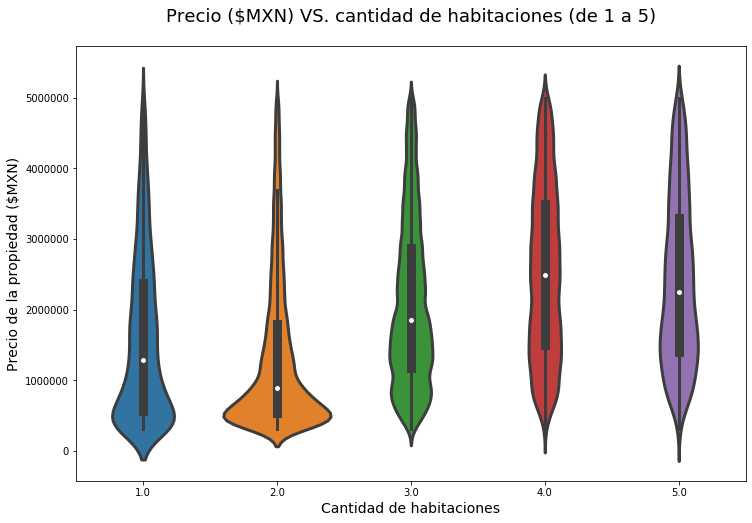

In [116]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio'] < 5000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

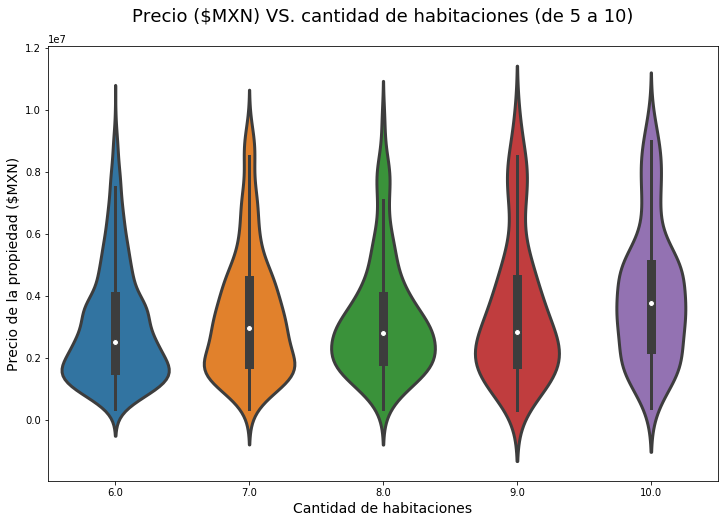

In [117]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio'] < 10000000),['habitaciones', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

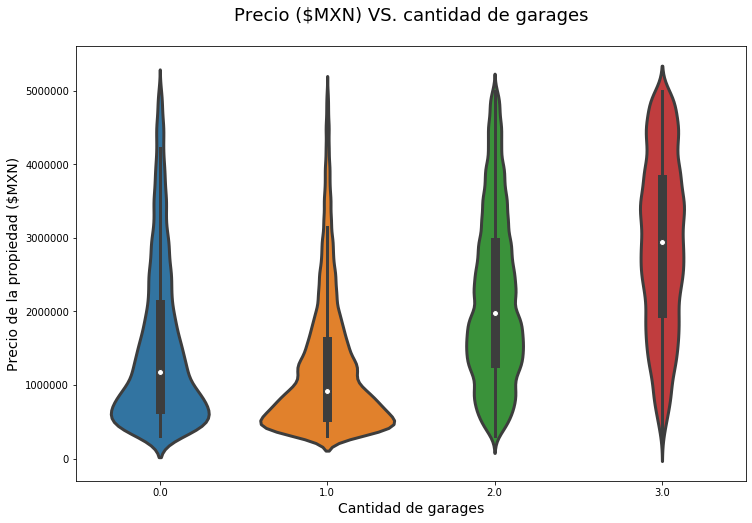

In [118]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['garages', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

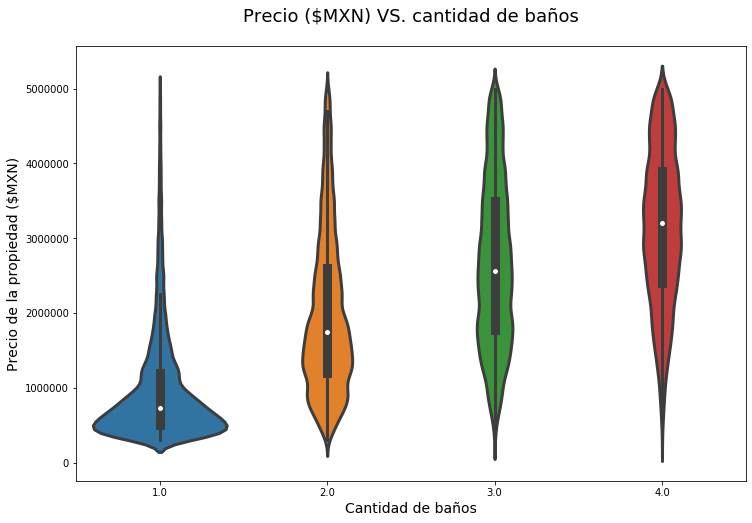

In [119]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio'] < 5000000),['banos', 'precio']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($MXN) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($MXN)",fontsize=14)
#plt.savefig('img/preciomxn_vs_cant_ban.png')
plt.show()

## Precio ($USD) VS algo

## Precio vs cantidad de habitaciones

Hasta 5 habitaciones

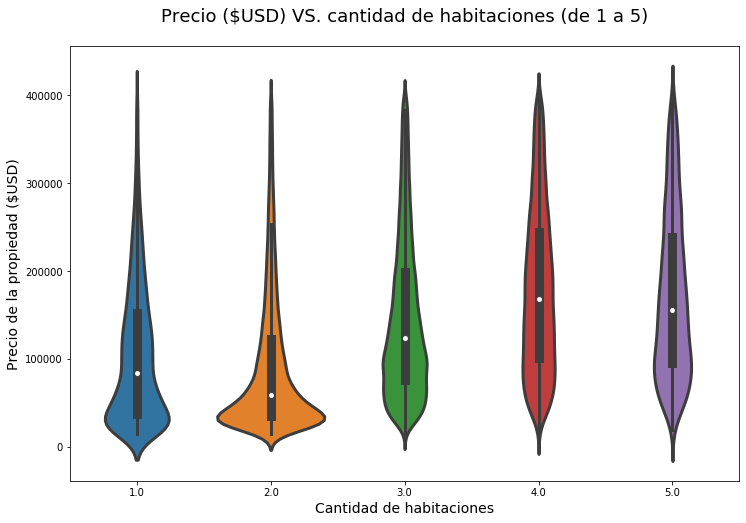

In [120]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 0)&(df_navent['habitaciones'] <= 5) \
               &(df_navent['precio_usd'] < 400000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 1 a 5)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_1_a_5.png')
plt.show()

De 5 a 10 habitaciones

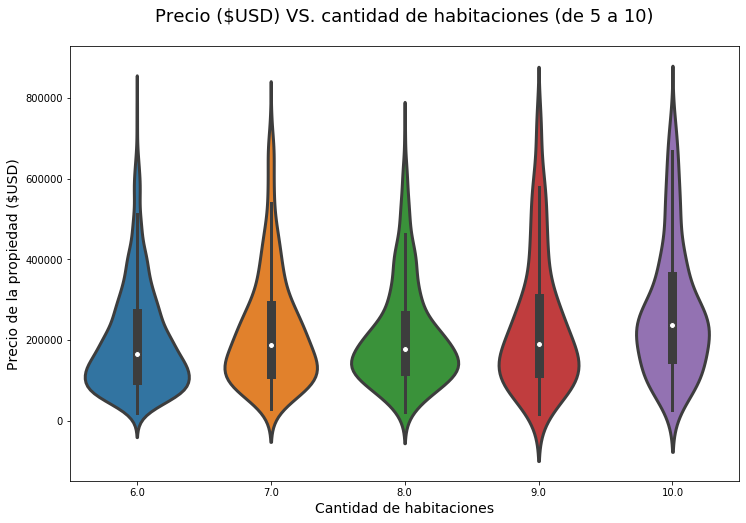

In [121]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['habitaciones'] > 5)&(df_navent['habitaciones'] <= 10) \
               &(df_navent['precio_usd'] < 800000),['habitaciones', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='habitaciones', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de habitaciones (de 5 a 10)",fontsize=18, pad=25)
plt.xlabel("Cantidad de habitaciones",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_hab_5_a_10.png')
plt.show()

## Precio vs cantidad de garages

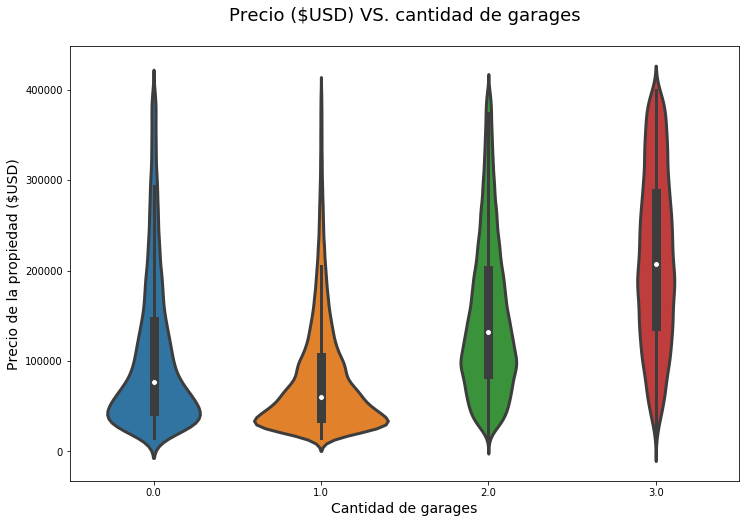

In [122]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['garages', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='garages', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de garages",fontsize=18, pad=25)
plt.xlabel("Cantidad de garages",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_gar.png')
plt.show()

## Precio vs cantidad de baños

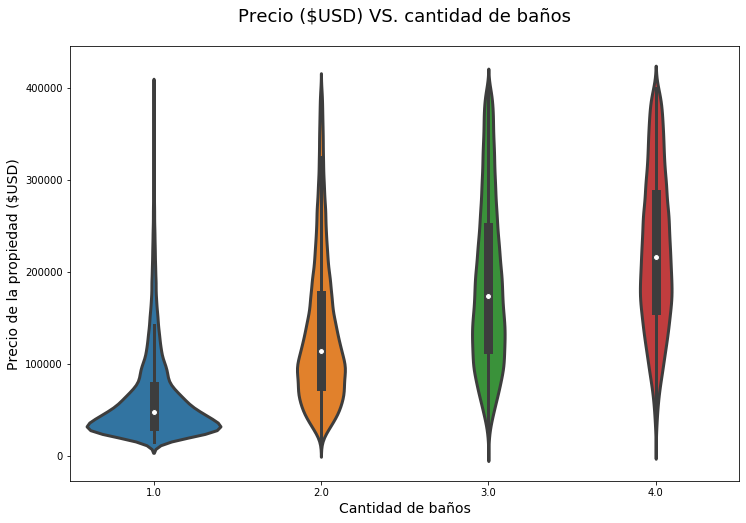

In [123]:
#Filtramos los datos para hacer al grafico apreciable
aux = df_navent.loc[(df_navent['precio_usd'] < 400000),['banos', 'precio_usd']]

fig = plt.figure(figsize=(12,8))
sns.violinplot(x='banos', y='precio_usd', data=aux,width=0.8, linewidth=3)

plt.title(u"Precio ($USD) VS. cantidad de baños",fontsize=18, pad=25)
plt.xlabel("Cantidad de baños",fontsize=14) 
plt.ylabel("Precio de la propiedad ($USD)",fontsize=14)
#plt.savefig('img/preciousd_vs_cant_ban.png')
plt.show()

## Coordenadas paralelas 

In [99]:
df = df_navent.copy()

In [100]:
df_navent.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [101]:
df = df[['tipodepropiedad','banos','habitaciones','garages']]

In [102]:
df = df.loc[(df['tipodepropiedad'] == "Casa") | (df['tipodepropiedad'] == "Apartamento") | (df['tipodepropiedad'] == "Casa en condominio")].copy()

In [103]:
from pandas.api.types import CategoricalDtype
status_type = CategoricalDtype(categories=['Casa','Apartamento','Casa en condominio'], ordered=True)
df['tipodepropiedad'] = df['tipodepropiedad'].astype(status_type)

In [104]:
df['tipodepropiedad'].cat.categories

Index(['Casa', 'Apartamento', 'Casa en condominio'], dtype='object')

In [105]:
df = df.dropna()

In [106]:
df.head()

,tipodepropiedad,banos,habitaciones,garages
0,Apartamento,2.0,2.0,1.0
1,Casa en condominio,2.0,3.0,2.0
2,Casa,2.0,3.0,2.0
3,Casa,1.0,2.0,1.0
4,Apartamento,1.0,2.0,1.0


In [107]:
df.tipodepropiedad.value_counts()

Casa                  110904
Apartamento            52246
Casa en condominio     15476
Name: tipodepropiedad, dtype: int64

In [108]:
df['code'] = df.tipodepropiedad.cat.codes

In [109]:
df.head()

,tipodepropiedad,banos,habitaciones,garages,code
0,Apartamento,2.0,2.0,1.0,1
1,Casa en condominio,2.0,3.0,2.0,2
2,Casa,2.0,3.0,2.0,0
3,Casa,1.0,2.0,1.0,0
4,Apartamento,1.0,2.0,1.0,1


In [110]:
df.code.value_counts()

0    110904
1     52246
2     15476
Name: code, dtype: int64

In [111]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='FCozza', api_key='fpQ9YB5Ekgy3YU8BZU2V')

data = [go.Parcoords(
        line = dict(color = df['code'],
                   colorscale = 'Jet'),
        dimensions = list([
            dict(range = [0,max(df['banos'])],
                label = 'Baños', values = df['banos']),
            dict(range = [0,max(df['habitaciones'])],
                label = 'Habitaciones', values = df['habitaciones']),
            dict(range = [0,max(df['garages'])],
                label = 'Garages', values = df['garages'])]))]
layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

/home/fabrizio/anaconda3/envs/tester/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

